In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [11]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)
print("Accuarcy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,pos_label='M'))
print("Recall:", recall_score(y_test, y_pred,pos_label='M'))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Accuarcy Score: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC: 0.99737962659679


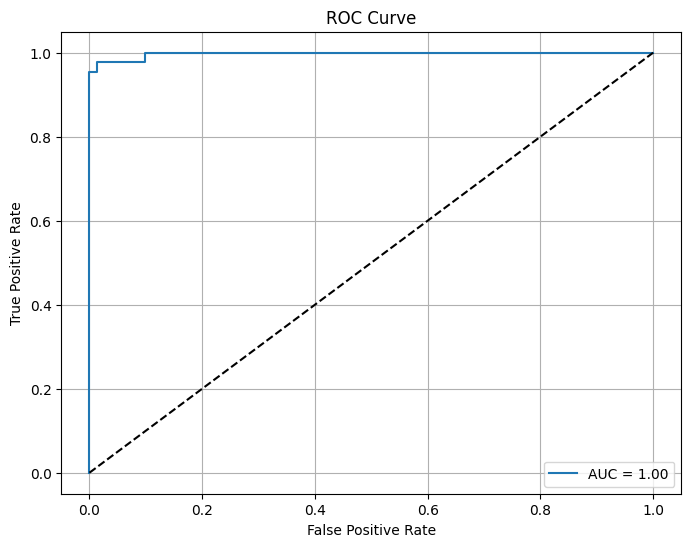

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba,pos_label='M')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [18]:
custom_threshold = 0.3
y_pred_custom = np.where(y_proba > custom_threshold, 'M', 'B')
print("\nCustom Threshold Evaluation (0.3):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Accuracy Score:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom,pos_label='M'))
print("Recall:", recall_score(y_test, y_pred_custom,pos_label='M'))


Custom Threshold Evaluation (0.3):
Confusion Matrix:
 [[67  4]
 [ 1 42]]
Accuracy Score: 0.956140350877193
Precision: 0.9130434782608695
Recall: 0.9767441860465116


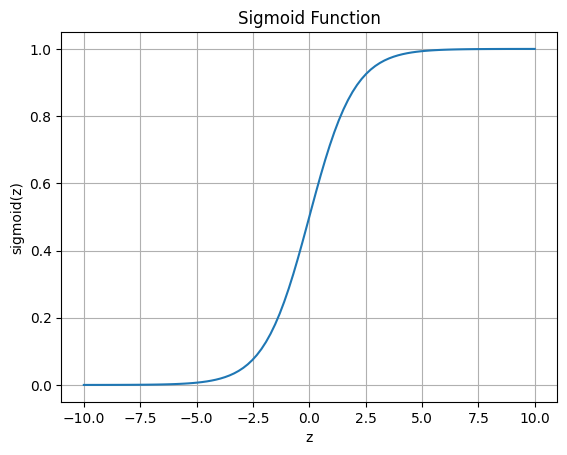

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_vals = np.linspace(-10, 10, 100)
plt.plot(z_vals, sigmoid(z_vals))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()

In [23]:
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
roc_auc = roc_auc_score(y_test, y_proba)
custom_threshold = 0.3
y_pred_custom = np.where(y_proba > custom_threshold, 'M', 'B')
conf_mat_custom = confusion_matrix(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom, pos_label='M')
recall_custom = recall_score(y_test, y_pred_custom, pos_label='M')


(conf_mat, report, precision, recall, roc_auc, conf_mat_custom, precision_custom, recall_custom)

(array([[70,  1],
        [ 2, 41]]),
 '              precision    recall  f1-score   support\n\n           B       0.97      0.99      0.98        71\n           M       0.98      0.95      0.96        43\n\n    accuracy                           0.97       114\n   macro avg       0.97      0.97      0.97       114\nweighted avg       0.97      0.97      0.97       114\n',
 0.9761904761904762,
 0.9534883720930233,
 np.float64(0.99737962659679),
 array([[67,  4],
        [ 1, 42]]),
 0.9130434782608695,
 0.9767441860465116)